<div class="alert alert-block alert-danger">
<b>Package version :</b>
    <ol>
    <li>Tensorflow 2.4.1</li>
    <li>Keras 2.4.3</li>
    <li>Matplotlib 3.5.0</li>
    </ol>
</div>

In [ ]:
## Just disables the warning, doesn't take advantage of AVX/FMA to run faster
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6456 - acc: 0.8221 - val_loss: 0.2193 - val_acc: 0.9407
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2038 - acc: 0.9421 - val_loss: 0.1576 - val_acc: 0.9538
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1460 - acc: 0.9597 - val_loss: 0.1297 - val_acc: 0.9619
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1142 - acc: 0.9686 - val_loss: 0.1106 - val_acc: 0.9669
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0948 - acc: 0.9730 - val_loss: 0.1028 - val_acc: 0.9677
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0795 - acc: 0.9776 - val_loss: 0.0938 - val_acc: 0.9700
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0689 - acc: 0.9806 - val_loss: 0.0911 - val_acc: 0.9709
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (100, 784)                0         
_________________________________________________________________
dense (Dense)                (100, 64)                 50240     
_________________________________________________________________
dense_1 (Dense)              (100, 10)                 650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 0s 618us/step - loss: 0.0791 - acc: 0.9760


[0.07907210290431976, 0.9760000109672546]

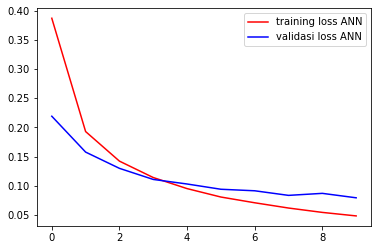

In [ ]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [ ]:
import numpy as np

pred = model1.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#model2 menggunakan Convolutional Neural Network

model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 9s 15ms/step - loss: 0.5355 - acc: 0.8491 - val_loss: 0.0702 - val_acc: 0.9772
Epoch 2/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0787 - acc: 0.9764 - val_loss: 0.0506 - val_acc: 0.9827
Epoch 3/10
600/600 [==============================] - 9s 16ms/step - loss: 0.0507 - acc: 0.9844 - val_loss: 0.0490 - val_acc: 0.9842
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0390 - acc: 0.9885 - val_loss: 0.0481 - val_acc: 0.9845
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0290 - acc: 0.9912 - val_loss: 0.0380 - val_acc: 0.9884
Epoch 6/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0238 - acc: 0.9925 - val_loss: 0.0299 - val_acc: 0.9902
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0198 - acc: 0.9939 - val_loss: 0.0344 - val_acc: 0.9902
Epoch 8/10
600/600 [==============================] - 9s 15ms/step - 

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0372 - acc: 0.9883


[0.037197694182395935, 0.9883000254631042]

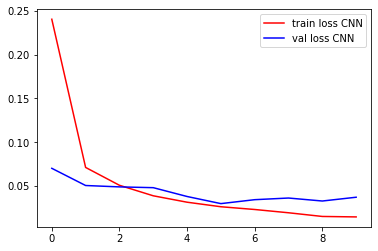

In [ ]:
import matplotlib.pyplot as plt

epochs = range(10)

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r',label='train loss CNN')
plt.plot(epochs,val_loss2,'b',label='val loss CNN')
plt.legend()

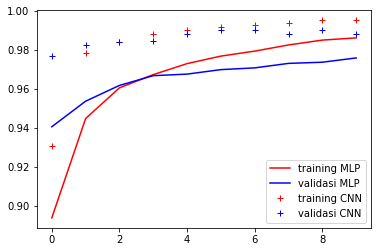

In [ ]:
import matplotlib.pyplot as plt

epochs = range(10)

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs,acc1,'r',label='training MLP')
plt.plot(epochs,val_acc1,'b',label='validasi MLP')

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

plt.plot(epochs,acc2,'r+',label='training CNN')
plt.plot(epochs,val_acc2,'b+',label='validasi CNN')
plt.legend()

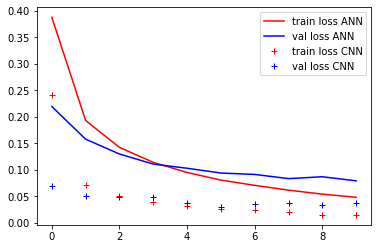

In [ ]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

In [ ]:
import numpy as np

pred = model2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3
